In [64]:
from circle import Circle
from rectangle import Rectangle
# I use the math.isclose()function to safely compare the area properties, which are floats.
import math

In [65]:
print("Testing Object Creation & __repr__")
print("===================================")
# Create the objects 
circle1 = Circle(x=0, y=0, radius=1)  # unit circle
circle2 = Circle(x=1, y=1, radius=1)
rectangle = Rectangle(x=0, y=0, width=1, height=1)

print(repr(circle1))
print(repr(circle2))
print(repr(rectangle))

print("\nTesting __eq__ (==) Operator")
print("===================================")
print(f"circle1 == circle2: {circle1 == circle2}")  # True
print(f"circle2 == rectangle: {circle2 == rectangle}")  # False

Testing Object Creation & __repr__
Circle(x=0.0, y=0.0, radius=1.0)
Circle(x=1.0, y=1.0, radius=1.0)
Rectangle(x=0.0, y=0.0, width=1.0, height=1.0)

Testing __eq__ (==) Operator
circle1 == circle2: True
circle2 == rectangle: False


In [66]:
print("\nTesting translate() Method")
print("===================================")
print(f"Circle 1 position BEFORE: ({circle1._x}, {circle1._y})")
circle1.translate(5, 3)
print(f"Circle 1 position AFTER: ({circle1._x}, {circle1._y})")


Testing translate() Method
Circle 1 position BEFORE: (0.0, 0.0)
Circle 1 position AFTER: (5.0, 3.0)


In [67]:
print("\nTesting Comparison (<, >=) Operators")
print("=====================================")
print(f"circle2.area = {circle2.area:.2f}")
print(f"circle1.area = {circle1.area:.2f}")
print(f"circle2 >= circle1: {circle2 >= circle1}")  # True
print(f"circle1 < circle2: {circle1 < circle2}")    # True
print(f"rectangle.area = {rectangle.area:.2f}")
print(f"circle1 == rectangle: {circle1 == rectangle}") # False
print(f"circle1.area is close to rectangle.area: {math.isclose(circle1.area, rectangle.area)}") # False (pi != 1)


Testing Comparison (<, >=) Operators
circle2.area = 3.14
circle1.area = 3.14
circle2 >= circle1: True
circle1 < circle2: False
rectangle.area = 1.00
circle1 == rectangle: False
circle1.area is close to rectangle.area: False


In [68]:
print("\nTesting Error Handling")
print("=====================================")
try:
    circle1.translate("THREE", 5)
except TypeError as e:
    print(f"Error: {e}")

try:
    rectangle2 = Rectangle(width=3, height="5")
except TypeError as e:
    print(f"Error: {e}")

try:
    c_neg = Circle(radius=-5)
except ValueError as e:
    print(f"Error: {e}")


Testing Error Handling
Error: Translation values 'dx' and 'dy' must be numeric.
Error: Width and height must be numeric.
Error: Radius must be positive.


In [69]:
print("\nTesting Methods")
print("=====================================")
print(f"circle1.is_unit_circle(): {circle1.is_unit_circle()}")
print(f"rectangle.is_square(): {rectangle.is_square()}")


Testing Methods
circle1.is_unit_circle(): True
rectangle.is_square(): True


In [70]:
print("\nTesting __str__ Method")
print("=====================================")
print(str(circle2))
print(str(rectangle))


Testing __str__ Method
A Circle centered at (1.0, 1.0) with an area of 3.14.
A Rectangle centered at (0.0, 0.0) with an area of 1.00.


Testing Shape2dPlotter


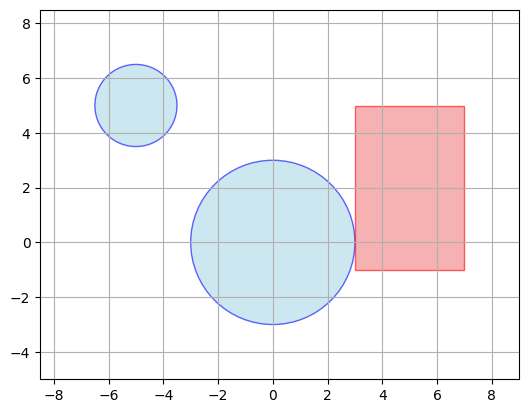

In [71]:
# Manual Testing the Plotter
from plotter import Shape2dPlotter
from circle import Circle
from rectangle import Rectangle
from cube import Cube

print("Testing Shape2dPlotter")

# Create an actual plotter object from the blueprint
plotter = Shape2dPlotter()

# Using its .add_shape() method to give it shapes
plotter.add_shape(Circle(x=0, y=0, radius=3))
plotter.add_shape(Rectangle(x=5, y=2, width=4, height=6))
plotter.add_shape(Circle(x=-5, y=5, radius=1.5)) # Add another circle

# Call the .show_plot() method to open the window
# This  line will make the figure appear.
plotter.show_plot()

Overlapping Shapes


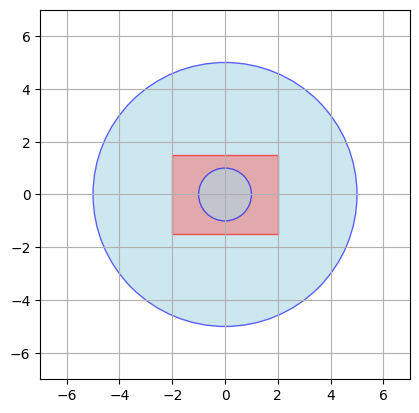

In [72]:
# Plotting Overlapping Shapes 
print("Overlapping Shapes")
plotter_overlap = Shape2dPlotter()
plotter_overlap.add_shape(Circle(x=0, y=0, radius=5)) # Big circle at center
plotter_overlap.add_shape(Rectangle(x=0, y=0, width=4, height=3)) # Smaller rectangle at center
plotter_overlap.add_shape(Circle(x=0, y=0, radius=1)) # Tiny circle at center

# This will open a plot showing 3 overlapping shapes
plotter_overlap.show_plot() 



Running Test 3: Empty Plotter
No shapes to plot.


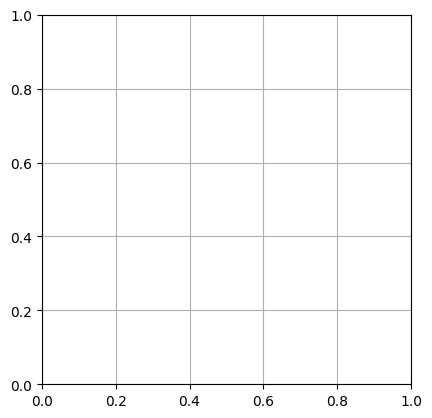

In [73]:
# Test 3: Plotting an Empty Plotter 
print("Running Test 3: Empty Plotter")
plotter_empty = Shape2dPlotter()
# I don't add any shapes
plotter_empty.show_plot() # This should just show a blank grid

Running Test 4: Ignoring 3D Shapes
Error: Skipping 3D shape Cube


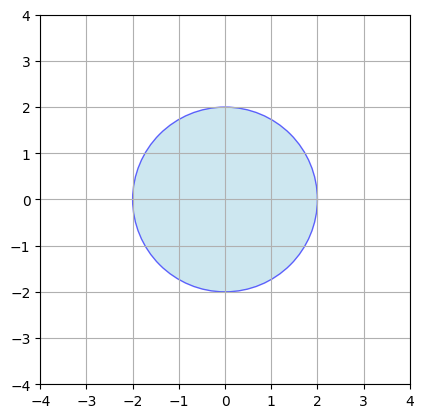

In [74]:
# Plotting 3D Shapes (Should be ignored) 
print("Running Test 4: Ignoring 3D Shapes")
plotter_3D_test = Shape2dPlotter()
plotter_3D_test.add_shape(Circle(x=0, y=0, radius=2)) # This should appear
plotter_3D_test.add_shape(Cube(x=5, y=5, z=5, side=2)) # This should be ignored

# This plot should only show the circle.
plotter_3D_test.show_plot()

# lab_2_indiramahadiva_python_DE25
### This project is an implementation of the "Geometry OOP Lab". The primary goal is to use object-oriented programming to build well-structured classes for 2D and 3D geometric shapes.
##### This project is built on OOP principles:
- Inheritance & DRY: A parent Shape class is used to hold all common logic (like position and comparison methods) to avoid repeating code (Don't Repeat Yourself).

- Polymorphism: Child classes (like Circle and Rectangle) override parent methods (like area and perimeter) to provide their own specific implementations.

- Composition: The bonus Shape2dPlotter class "has-a" list of Shape objects, demonstrating a different kind of OOP relationship.

##### 🌟 Features
Task 1:

- Shape Base Class: A single "parent" class that provides all common logic:

    - _x, _y attributes for position.
    - translate() method for moving the shape.
    - Error handling for all inputs (e.g., TypeError for non-numeric values, ValueError for radius <= 0).

- Polymorphic Methods:

    - __str__ (for print()) is defined once in the Shape class and inherited by all children.
    - __repr__ is defined separately in each child class to include  data (_radius).

- Read-Only Properties:
    
    - @property is used for area and perimeter, making them read-only (getters without setters).

- Operator Overloading:

    - __eq__ (for ==) is overridden in each child class to compare attributes ( _radius for Circle).
    - __lt__, __gt__, __le__, __ge__ (for <, >, etc.) are defined once in the Shape class to compare all shapes based on their area.
    
- Methods:
    
    - Circle class with is_unit_circle() method.
    - Rectangle class with is_square() method.

Task 2: Features

- 3D Shape :

    - A Geometry parent class that inherits from Shape to add _z and volume/surface_area properties.
    - Cube and Sphere classes that inherit from Geometry and implement the 3D math formulas.

- Unit Tests:

    - A full pytest test suite with separate files (test_circle.py, test_rectangle.py, etc.) for all four shape classes .
    - Tests check all calculations, inheritance, and error handling (using pytest.raises).

- Composition & Plotting:

    - A Shape2dPlotter class that demonstrates composition by holding a list of Shape objects.
    - Uses matplotlib.patches.Circle and matplotlib.patches.Rectangle to draw the 2D shapes on a graph.

##### 📚 External Sources & Concepts Used
- @property Decorator: Used to create read-only getters for area and perimeter, as learned from https://github.com/indiramahadiva/STI_DE_25_indiramahadiva

- math.isclose(): Used for safe float comparisons in __eq__ and is_unit_circle, as recommended by the official Python math docs.

- Pytest (Task 2):

    - pytest.raises: Implemented to test for TypeError and ValueError based on the pytest exception documentation.

    - pytest.approx: Implemented to safely test float calculations (like area and volume), as learned from the pytest float comparison docs.

- Matplotlib (Task 2):

    - matplotlib.patches: The plotter.py class uses matplotlib.patches.Circle and matplotlib.patches.Rectangle as required by the lab  and learned from the official patches documentation.

    - Coordinate Conversion: The most critical part of the plotter was learning from the Rectangle patch docs that it requires a bottom-left corner coordinate, not a center. This required implementing the conversion logic: bottom_left_x = shape._x - (shape._width / 2).

